In [2]:
from sentence_transformers import SentenceTransformer
from PIL import Image
import os

model = SentenceTransformer("clip-ViT-B-32")
model = model.to('cuda')


/home/adam/miniconda3/envs/cells/lib/python3.10/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange


In [3]:
encodings = []
classes = []
path = []
for image_class in os.listdir('cells_final'):
    for img in os.listdir(f'cells_final/{image_class}'):
        path.append(f'cells_final/{image_class}/{img}')
        encodings.append(model.encode(Image.open(f'cells_final/{image_class}/{img}')))
        classes.append(image_class)
                         
        

KeyboardInterrupt: 

In [ ]:
import pandas as pd
df = pd.DataFrame()
df['embeddings'] = encodings
df['classes'] = classes
df['path'] = path
#df.to_csv('embedings.csv')

In [1]:
import pandas as pd
df = pd.read_csv('embedings.csv')

In [4]:
from sklearn.manifold import TSNE
import numpy as np



# The default of 1,000 iterations gives fine results, but I'm training for longer just to eke
# out some marginal improvements. NB: This takes almost an hour!
tsne = TSNE(metric="euclidean", n_jobs=-1)

embs = tsne.fit_transform(np.array(encodings))
# Add to dataframe for convenience
df['x'] = embs[:, 0]
df['y'] = embs[:, 1]

NameError: name 'df' is not defined

In [5]:
import pandas as pd
df = pd.DataFrame()
df['x'] = embs[:, 0]
df['y'] = embs[:, 1]

In [11]:
df['class'] = classes

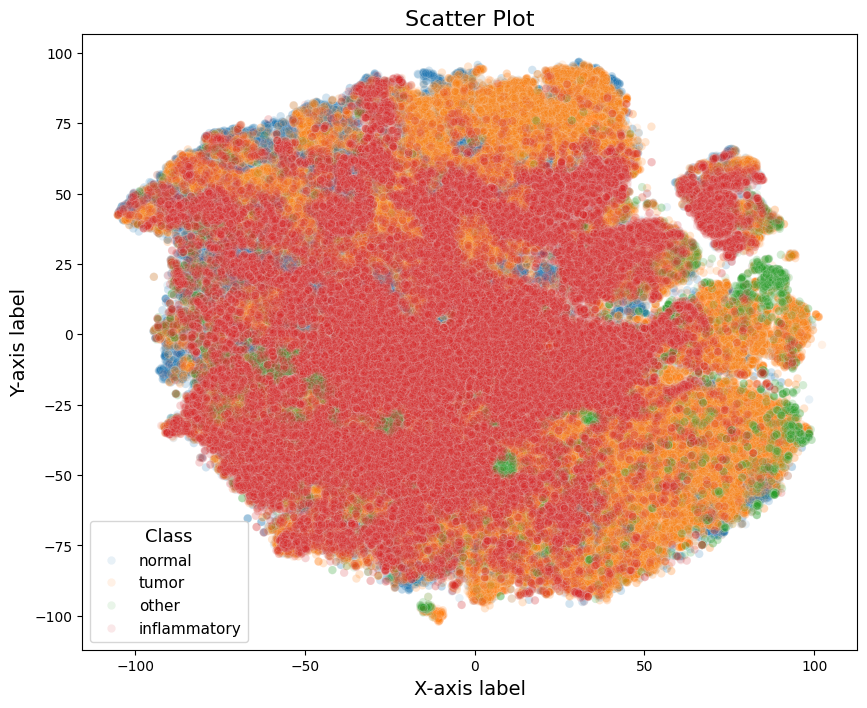

In [23]:

FS = (10, 8)

# Create the plot
fig, ax = plt.subplots(figsize=FS)
sns.scatterplot(x='x', y='y', data=df, hue='class', alpha=0.1)

# Enhance plot aesthetics
ax.set_title('Scatter Plot', fontsize=16)
ax.set_xlabel('X-axis label', fontsize=14)
ax.set_ylabel('Y-axis label', fontsize=14)
ax.legend(title='Class', title_fontsize='13', fontsize='11')

plt.show()

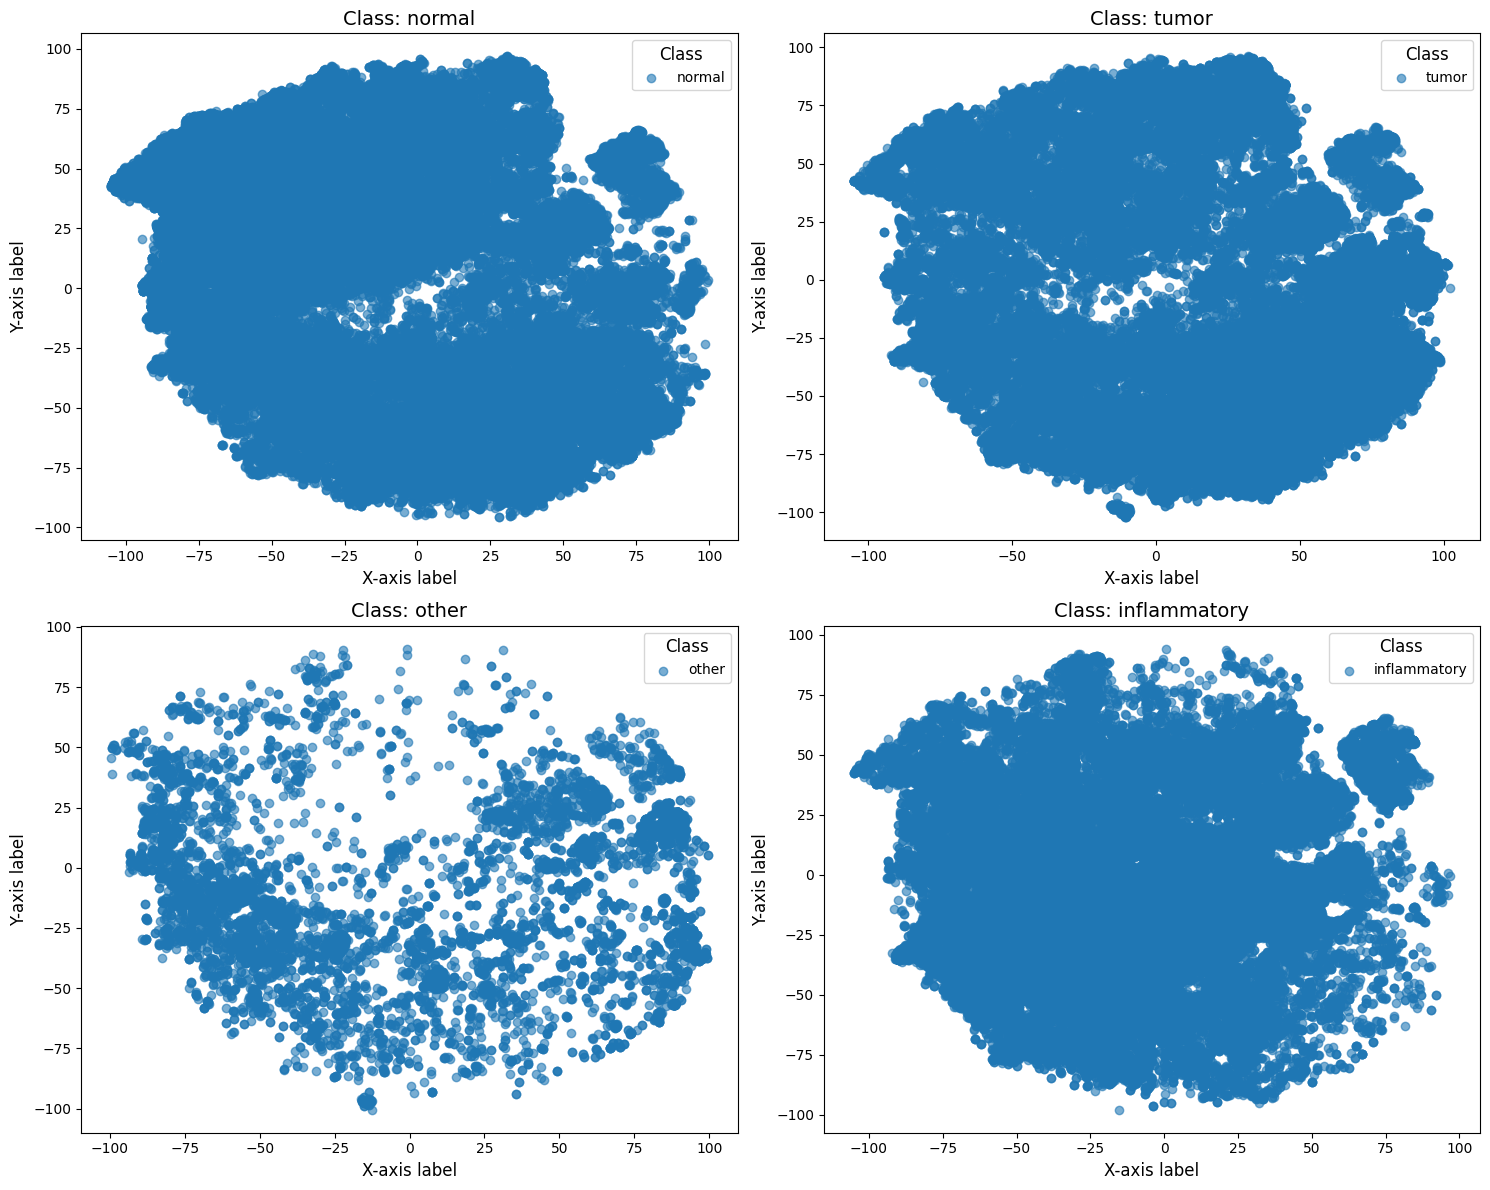

In [22]:
import matplotlib.pyplot as plt

# Define figure size and number of subplots
FS = (15, 12)
num_classes = 4  # Adjust this based on the actual number of classes
rows, cols = 2, 2  # Adjust rows and cols as needed

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=FS)

# Get unique classes
classes = df['class'].unique()

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot each class in its subplot
for i, cls in enumerate(classes):
    subset = df[df['class'] == cls]
    ax = axes[i]
    ax.scatter(subset['x'], subset['y'], alpha=0.6, label=cls)
    ax.set_title(f'Class: {cls}', fontsize=14)
    ax.set_xlabel('X-axis label', fontsize=12)
    ax.set_ylabel('Y-axis label', fontsize=12)
    ax.legend(title='Class', title_fontsize='12', fontsize='10')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=2)
pca_embs = pca.fit_transform(np.array(encodings))

# Add to dataframe for convenience
df['pca_x'] = pca_embs[:, 0]
df['pca_y'] = pca_embs[:, 1]


In [ ]:

import umap.umap_ as umap

# Perform UMAP
umap_reducer = umap.UMAP(n_components=2, metric="euclidean", n_jobs=-1, min_dist=0.01, n_neighbors=50)
umap_embs = umap_reducer.fit_transform(arr)

# Add to dataframe for convenience
df['umap_x'] = umap_embs[:, 0]
df['umap_y'] = umap_embs[:, 1]


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define figure size and number of subplots
FS = (18, 6)

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=FS)

# t-SNE plot


# PCA plot
sns.scatterplot(ax=axes[1], x='pca_x', y='pca_y', hue='class', data=df, palette='tab10', alpha=0.1)
axes[1].set_title('PCA')
axes[1].set_xlabel('pca_x')
axes[1].set_ylabel('pca_y')

# UMAP plot
sns.scatterplot(ax=axes[0], x='umap_x', y='umap_y', hue='class', data=df, palette='tab10', alpha=0.1)
axes[0].set_title('UMAP')
axes[0].set_xlabel('umap_x')
axes[0].set_ylabel('umap_y')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


In [39]:
import numpy as np
np.save('array.npy', np.array(encodings))

In [8]:
df.to_csv('reduced.csv')